<a href="https://colab.research.google.com/github/lucasferreiraos/quarentenadados-alura/blob/master/QuarentenaDados_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 01

Durante a primeira aula os professores lançaram 7 desafios para que os alunos pudessem praticar e compartilhar suas resoluções posteirormente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

In [ ]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'avaliacao', 'momento']
filmes.columns = ['filmeId', 'titulo', 'genero']

In [ ]:
avaliacoes.head()

,usuarioId,filmeId,avaliacao,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['avaliacao'].mean()

In [ ]:
filmes = filmes.join(notas_medias_por_filme, on='filmeId')
filmes.head()

,filmeId,titulo,genero,avaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Desafio #1: mostrar os filmes que não receberam avaliação.

Essa resolução me fez descobrir uma faceta sobre valores `Nan`. Uma coluna (ou um objeto `Pandas.Series`) contém valores ("válidos") de um único tipo. No caso da coluna `avaliacao`, seus dados são do tipo `float` e nas linhas onde o filme não recebeu avaliação o valor é `Nan`. Então se você fizer uma operação de `==` ou `!=` com qualquer coluna, você está comparando se o tipo da coluna é igual ou diferente do elemento que estiver do outro lado do operador.

In [ ]:
filmes.query('avaliacao != avaliacao')

,filmeId,titulo,genero,avaliacao
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Desafio #2: mudar o nome da coluna para `mediaAvaliacao` após o join.

In [ ]:
filmes.rename(columns={'avaliacao': 'mediaAvaliacao'}, inplace=True)
# ou: filmes = filmes.rename(columns={'avaliacao': 'mediaAvaliacao'})
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Desafio #3: colocar o número de avaliações (total de votos) de cada filme.

A coluna `totalAvaliacoes` ficou com os valores em `float` após o join. Depois decidi converter esses valores pra `int` e, como existiam alguns valores `NaN`, foi preciso substituir os valores nulos para que o "parser" funcionasse.

In [ ]:
total_avaliacoes_por_filme = avaliacoes.groupby('filmeId')['avaliacao'].count()
filmes = filmes.join(total_avaliacoes_por_filme, on='filmeId')
filmes = filmes.rename(columns={'avaliacao': 'totalAvaliacoes'})

In [ ]:
filmes['totalAvaliacoes'] = filmes['totalAvaliacoes'].fillna(-1).astype(int)
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


### Desafio #4: arredondar as notas médias para 2 casas decimais.

In [ ]:
decimals = 2
filmes['mediaAvaliacao'] = filmes['mediaAvaliacao'].apply(lambda x: round(x, decimals))
filmes.head()

,filmeId,titulo,genero,mediaAvaliacao,totalAvaliacoes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


### Desafio #5: descobrir os gêneros dos filmes (quais são eles, únicos).

Na linha 1 o argumento `expand` faz com que cada item separado por pipe seja colocado em uma coluna. Em seguida o método `melt`
faz com que os dados fiquem nas linhas e o `dropna` remove os valores nulos. Por fim, o método `unique` inibe as repetições
fazendo com que seja exibido - de forma mais amigável - todos os gêneros existents no dataset.

In [ ]:
generos = filmes['genero'].str.split(pat='|', expand=True)
generos_filtrados = pd.melt(generos).dropna()
generos_filtrados.columns = ['indice', 'generos']
generos = pd.DataFrame({'generos': generos_filtrados['generos'].unique()})
generos

,generos
0,Adventure
1,Comedy
2,Action
3,Drama
4,Crime
5,Children
6,Mystery
7,Animation
8,Documentary
9,Thriller


### Desafio #6: descobrir quantos filmes tem para cada gênero.

In [ ]:
aparicoes_por_genero = generos_filtrados.groupby('generos').count()
aparicoes_por_genero = aparicoes_por_genero.rename(columns={'indice': 'aparicoes'}).reset_index()
aparicoes_por_genero

,generos,aparicoes
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


### Desafio #7: plotar o gráfico de aparições por gênero.

<BarContainer object of 20 artists>

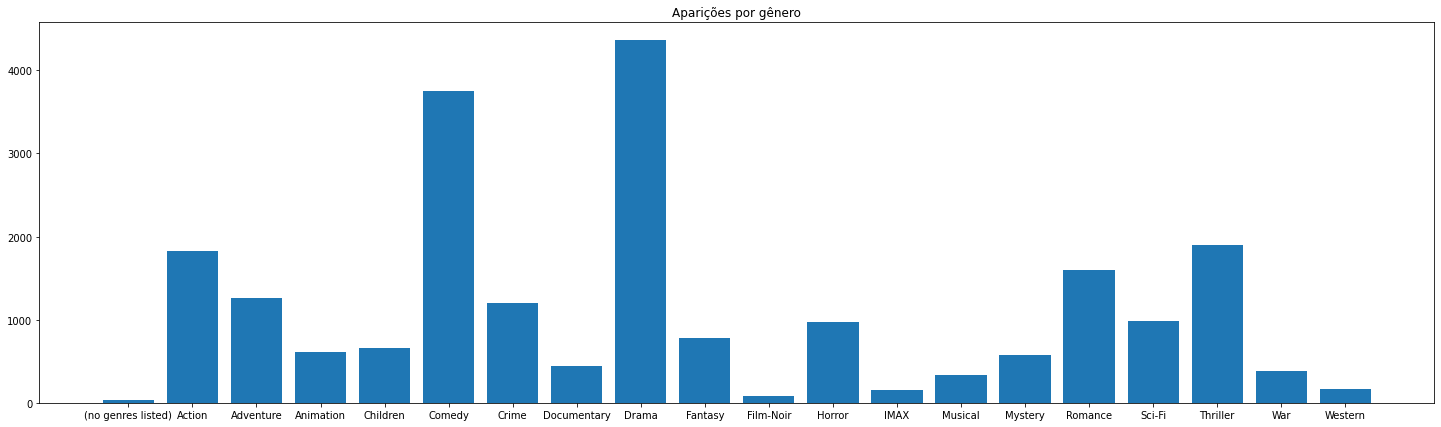

In [ ]:
plt.figure(figsize=(25, 7))
plt.title('Aparições por gênero')
plt.bar(aparicoes_por_genero['generos'], aparicoes_por_genero['aparicoes'])